# Компьютерная работа
## Морозова  Анастасия

In [77]:
import networkx as nx
import numpy as np
import pylab as plt
%matplotlib inline

In [3]:
g = nx.read_edgelist("CA-HepTh.txt")

### 1) Вычислите топологические свойства (число вершин, число ребер, плотность, радиус, диаметр, ассортативность, средний кратчайший путь, транзитивность, средний коэффициент кластеризации)

In [14]:
print("Число вершин: %d" % nx.number_of_nodes(g))
print("Число ребер: %d" % nx.number_of_edges(g))
print("Плотность: %s" % nx.density(g))

Число вершин: 9877
Число ребер: 25998
Плотность: 0.000533044909248889


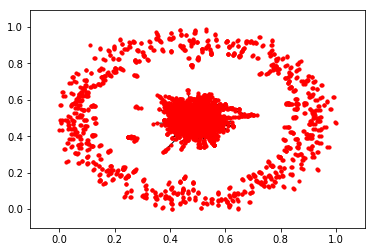

In [15]:
nx.draw_networkx(g, node_size=10,with_labels=False)

In [8]:
print("В данном графе {} компонент".format(nx.number_connected_components(g)))

В данном графе 429 компонент


Возьмем компоненту с наибольшим количеством вершин и будем проводить анализ для неё.

In [13]:
m=[]
for i in list(nx.connected_component_subgraphs(g)):
    m.append(i.number_of_nodes())
print("Наибольшая компонента имеет длину: {}".format(max(m)))

Наибольшая компонента имеет длину: 8638


In [16]:
for i in nx.connected_component_subgraphs(g):
    if (len(i)==8638):
        print ("Длина компоненты: %d" % len(i))
        print ("Радиус: %d" % nx.radius(i))
        print ("Диаметр: %d" % nx.diameter(i))
        print ("Ассортативность: %s" % nx.degree_assortativity_coefficient(i))
        print ("Средний кратчайший путь: %s" % nx.average_shortest_path_length(i))
        print ("Средний коэфиициент кластеризации: %s" % nx.average_clustering(i))
        print ("Транзитивность: %s" % nx.transitivity(i))
        print ('')

Длина компоненты: 8638
Радиус: 10
Диаметр: 18
Ассортативность: 0.238587530342
Средний кратчайший путь: 5.945432380163172
Средний коэфиициент кластеризации: 0.4815641520261674
Транзитивность: 0.281129264921973



In [71]:
for i in nx.connected_component_subgraphs(g):
    if (len(i)==8638):
        print ("Длина компоненты: %d" % len(i))
        print ("Ассортативность: %s" % nx.degree_assortativity_coefficient(i))
        #print ("Средний кратчайший путь: %s" % nx.average_shortest_path_length(i))
        print ("Средний коэфиициент кластеризации: %s" % nx.average_clustering(i))
        print ("Транзитивность: %s" % nx.transitivity(i))
        print ('')

Длина компоненты: 8638
Ассортативность: 0.238587530342
Средний коэфиициент кластеризации: 0.4815641520261674
Транзитивность: 0.281129264921973



### 2) Постройте распределения по степени связности, распределение коэффициента кластеризации, распределение центральности. Какой статистике подчиняются эти распределения, сделайте предположения, подтвердите их соответствующей аппроксимацией (здесь речь идет в первую очередь о распределении по степеням degree distribution)

#### Распределение по степени связности

<function matplotlib.pyplot.plot>

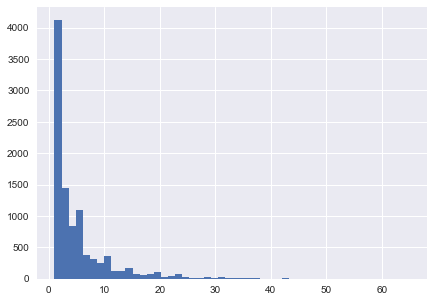

In [51]:
degree_sequence=sorted(nx.degree(g).values(),reverse=True)
plt.figure(figsize=(7, 5))
plt.hist(degree_sequence, bins=50)
plt.plot

Данное распределение подчиняется степенному закону. Докажем это с помощью степенной аппроксимации.

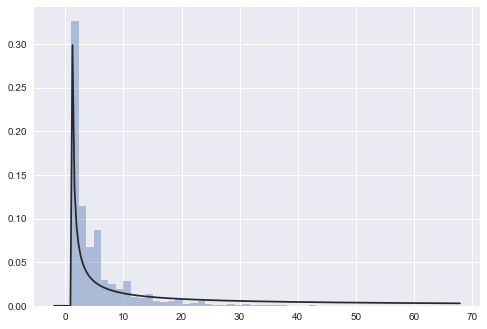

In [52]:
import seaborn as sns
import scipy
sns.distplot(degree_sequence, kde=False, fit=scipy.stats.powerlaw)

#### Распределение коэффициента кластеризации

<function matplotlib.pyplot.plot>

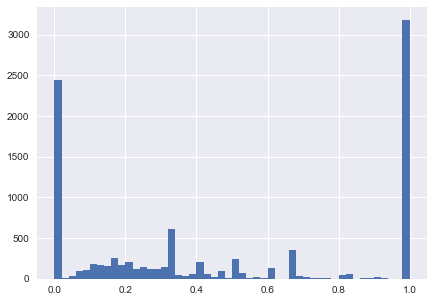

In [53]:
clustering_sequence=sorted(nx.clustering(g).values(),reverse=True)
plt.figure(figsize=(7, 5))
plt.hist(clustering_sequence, bins=50)
plt.plot

#### Распределение центральностей

[]

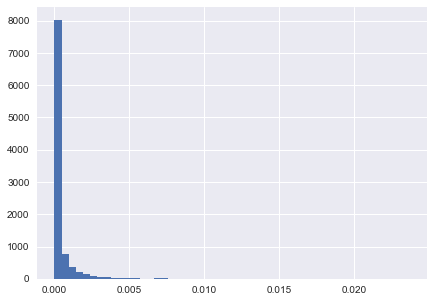

In [54]:
betweenness_centrality_sequence=sorted(nx.betweenness_centrality(g).values(),reverse=True) 
plt.figure(figsize=(7, 5))
plt.hist(betweenness_centrality_sequence, bins=50)
plt.plot()

### 3) Смоделируйте случайные сети с таким же числом вершин и такой же плотностью: случайная сеть Эрдеша-Реньи, случайная сеть Барабаши-Альберта. Для ансамбля таких сетей определите средние значения топологических характеристик, сравните с выбранной сетью (пункт 1). Какая модель описывает свойства лучше?

Смоделируем сети с параметрами выбранной сети:

In [57]:
nodes = nx.number_of_nodes(g)
density = nx.density(g)
print("Число вершин: {}, плотность: {}".format(nodes, density))

Число вершин: 9877, плотность: 0.000533044909248889


#### Сеть Эрдеша-Реньи

In [75]:
num = 100
ER_ass = []
#ER_av_p = []
ER_cl = []
ER_tr = []
for j in range(num):
    ER = nx.erdos_renyi_graph(nodes, density)
    for i, p in enumerate(nx.connected_component_subgraphs(ER)):
        if (i==0):
            ER_ass.append(nx.degree_assortativity_coefficient(p))
            ER_cl.append(nx.average_clustering(p))
            ER_tr.append(nx.transitivity(p))

Посчитаем средние характеристики для ансамбля сетей.(Средний путь не считала, так как очень долго считается)

In [78]:
ER_ass_m = np.mean(ER_ass)
#ER_av_p_m = np.mean(ER_av_p)
ER_cl_m = np.mean(ER_cl)
ER_tr_m = np.mean(ER_tr)

In [81]:
print ("Средняя ассортативность: {}".format(ER_ass_m))
print ("Средний коэффициент кластеризации: {}".format(ER_cl_m))
print ("Средняя транзитивность: {}".format(ER_tr_m))

Средняя ассортативность: 0.00026030035698954614
Средний коэффициент кластеризации: 0.0005244069684615409
Средняя транзитивность: 0.0005385387702818154


#### Сеть Барабаши-Альберта

Для того, чтобы построить данную модель необходимо определить число ребер у новой вершины так, чтобф совпадали плотности первоначального и моделируемого графов.

In [84]:
l = np.arange(1, 5)
razn = []
for i in l:
    BA = nx.barabasi_albert_graph(nodes, i)
    d = nx.density(BA)
    razn.append(abs(d - density))
m = razn.index(min(razn))
print("Выбранное m: {}".format(m))

Выбранное m: 2


In [86]:
num = 100
BA_ass = []
#ER_av_p = []
BA_cl = []
BA_tr = []
for j in range(num):
    BA = nx.barabasi_albert_graph(nodes,2)
    for i, p in enumerate(nx.connected_component_subgraphs(BA)):
        if (i==0):
            BA_ass.append(nx.degree_assortativity_coefficient(p))
            BA_cl.append(nx.average_clustering(p))
            BA_tr.append(nx.transitivity(p))

In [87]:
BA_ass_m = np.mean(BA_ass)
#BA_av_p_m = np.mean(ER_av_p)
BA_cl_m = np.mean(BA_cl)
BA_tr_m = np.mean(BA_tr)

In [88]:
print ("Средняя ассортативность: {}".format(BA_ass_m))
print ("Средний коэффициент кластеризации: {}".format(BA_cl_m))
print ("Средняя транзитивность: {}".format(BA_tr_m))

Средняя ассортативность: -0.045864615199310996
Средний коэффициент кластеризации: 0.004668431204784876
Средняя транзитивность: 0.0015786505012949392


###  4) (дополнительно) к распределениям пункта 2 добавьте распределения, характерные для ансамбля случайных сетей из пункта 3. Какая модель лучше описывает локальные свойства выбранной сети?

Сеть Эрдеша-Реньи

<function matplotlib.pyplot.plot>

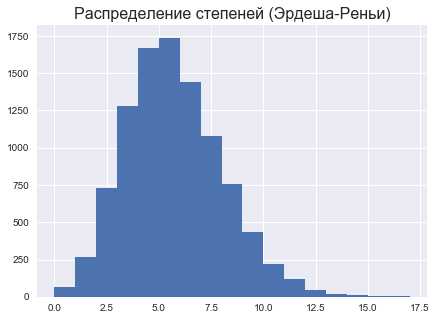

In [98]:
ER1 = nx.erdos_renyi_graph(nodes, density)
degree_sequence = sorted(nx.degree(ER1).values(),reverse=True)
b = max(degree_sequence)-min(degree_sequence)
plt.figure(figsize = (7, 5))
plt.hist(degree_sequence, bins=b)
plt.title("Распределение степеней (Эрдеша-Реньи)", fontsize=16)
plt.plot

<function matplotlib.pyplot.plot>

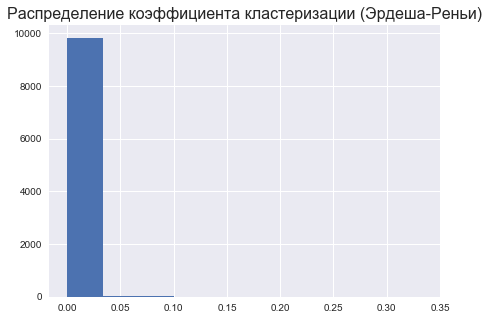

In [105]:
clustering_sequence=sorted(nx.clustering(ER1).values(),reverse=True)
plt.figure(figsize=(7, 5))
plt.hist(clustering_sequence, bins=10)
plt.title("Распределение коэффициента кластеризации (Эрдеша-Реньи)", fontsize=16)
plt.plot

[]

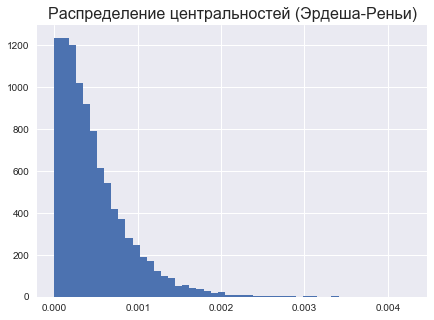

In [100]:
betweenness_centrality_sequence=sorted(nx.betweenness_centrality(ER1).values(),reverse=True) 
plt.figure(figsize=(7, 5))
plt.hist(betweenness_centrality_sequence, bins=50)
plt.title("Распределение центральностей (Эрдеша-Реньи)", fontsize=16)
plt.plot()

Сеть Барабаши-Альберта

<function matplotlib.pyplot.plot>

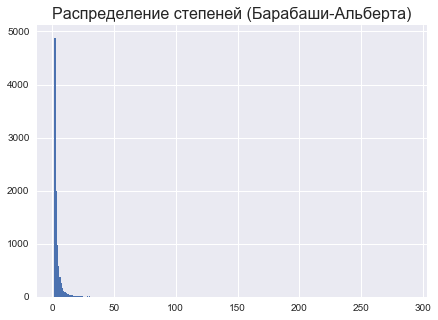

In [107]:
BA1 = nx.barabasi_albert_graph(nodes,2)
degree_sequence = sorted(nx.degree(BA1).values(),reverse=True)
b = max(degree_sequence)-min(degree_sequence)
plt.figure(figsize = (7, 5))
plt.hist(degree_sequence, bins=b)
plt.title("Распределение степеней (Барабаши-Альберта)", fontsize=16)
plt.plot

<function matplotlib.pyplot.plot>

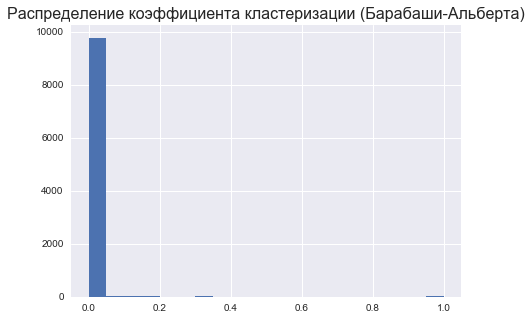

In [108]:
clustering_sequence=sorted(nx.clustering(BA1).values(),reverse=True)
plt.figure(figsize=(7, 5))
plt.hist(clustering_sequence, bins=20)
plt.title("Распределение коэффициента кластеризации (Барабаши-Альберта)", fontsize=16)
plt.plot

[]

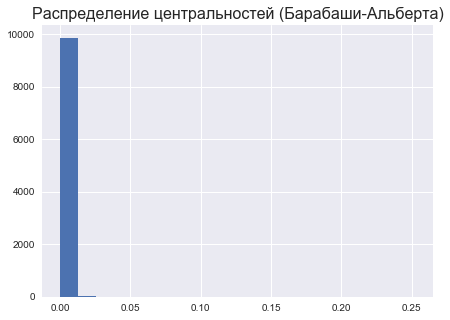

In [109]:
betweenness_centrality_sequence=sorted(nx.betweenness_centrality(BA1).values(),reverse=True) 
plt.figure(figsize=(7, 5))
plt.hist(betweenness_centrality_sequence, bins=20)
plt.title("Распределение центральностей (Барабаши-Альберта)", fontsize=16)
plt.plot()

На основании построенных графиков и полученных численных характеристик можно сделать вывод о том, что сети Эрдеша-Реньи плохо описывает выбранную ранее сеть (числовые характеристики значительно различаются, а распределения имеют совершенно разный вид).
Сеть Барабаши-Альберта описывает выбранную ранее сеть лучше (числовые характеристики немного различны, но распределения близки).